# 無重疊年份的 Features 迴歸

In [1]:
import pandas as pd
import numpy as np

In [2]:
hm_features_overlapping = pd.read_csv('../output_dataset/handmade_features_overlapping_score.csv')
hm_features_non_overlapping = pd.read_csv('../output_dataset/handmade_features_non_overlapping_score.csv')
greenwash_score = pd.read_csv('../CSR_score/common_score_ESG_all.csv', index_col=0)

In [3]:
# 先過濾資料列
hm_features_non_overlapping_filtered = hm_features_non_overlapping[
    hm_features_non_overlapping['greenwash_score'].notna() & 
    (hm_features_non_overlapping['greenwash_score'] != 0)
]

# 再過濾欄位名稱中不包含 ESGBERT 的欄位
cols_to_keep = [col for col in hm_features_non_overlapping_filtered.columns if 'ESGBERT' not in col]
hm_features_non_overlapping_filtered = hm_features_non_overlapping_filtered[cols_to_keep]

hm_features_non_overlapping_filtered

,folder_name,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,superlative,present,past,future,exchange,ticker,year1,greenwash_score
3,NASDAQ_EGLE_2019,0.008621,10.462960,15.18,26.85,17.7,18.3,0.062345,0.381435,18,15,347,229,4,NASDAQ,EGLE,2019,-12.036379
4,NASDAQ_INFN_2020,0.000911,11.708846,13.45,10.03,18.9,19.6,0.127286,0.371186,29,31,1111,590,15,NASDAQ,INFN,2020,-3.707492
5,NASDAQ_AMAT_2016,0.027523,10.648183,13.18,22.75,17.5,17.4,0.109356,0.340217,17,14,365,212,3,NASDAQ,AMAT,2016,-16.924727
6,NASDAQ_PRGO_2020,0.038168,10.917794,12.31,23.46,16.7,15.9,0.141645,0.385806,38,15,552,340,14,NASDAQ,PRGO,2020,-14.212503
7,NASDAQ_MSFT_2015,0.011029,12.169730,13.39,17.27,19.2,20.2,0.128524,0.374644,87,44,1842,786,30,NASDAQ,MSFT,2015,-29.966602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,NYSE_ACM_2011,0.007407,11.281006,13.13,12.97,18.0,18.2,0.120334,0.335396,25,11,787,395,34,NYSE,ACM,2011,-8.682335
5912,NYSE_LOW_2013,0.065920,12.139083,10.14,42.00,14.6,13.3,0.169261,0.397658,208,41,1881,1486,70,NYSE,LOW,2013,-24.025278
5913,NYSE_CNO_2019,0.014134,10.683271,12.49,16.02,17.5,16.9,0.160021,0.348145,27,19,510,189,2,NYSE,CNO,2019,-32.085445
5914,NYSE_ABBV_2019,0.005908,11.565679,11.60,24.17,16.8,16.4,0.170862,0.412306,72,34,1101,554,21,NYSE,ABBV,2019,-11.671868


In [4]:
hm_features_non_overlapping_filtered.describe()


,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,superlative,present,past,future,year1,greenwash_score
count,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.00000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000
mean,0.016022,11.443046,12.506136,22.722509,17.322789,17.283441,0.123637,0.378821,68.94815,29.787999,1249.831696,710.043069,30.042860,2017.416266,-9.477268
std,0.020697,0.868841,1.584175,7.326009,1.266627,1.943361,0.031869,0.034214,62.91825,24.654582,1032.626295,674.572557,32.390452,3.580356,15.822796
min,0.000000,7.142827,8.200000,-22.560000,11.100000,7.500000,-0.075269,0.209079,0.00000,0.000000,3.000000,2.000000,0.000000,2005.000000,-55.379176
25%,0.004893,10.922669,11.495000,18.990000,16.500000,16.100000,0.104355,0.357773,26.00000,13.000000,557.000000,289.000000,10.000000,2016.000000,-19.728739
50%,0.010033,11.528523,12.370000,22.240000,17.300000,17.200000,0.122857,0.379136,51.00000,23.000000,997.000000,539.000000,20.000000,2019.000000,-10.583396
75%,0.019596,12.048377,13.295000,27.010000,18.000000,18.300000,0.141682,0.398909,91.00000,40.000000,1640.500000,921.500000,39.000000,2020.000000,-0.747760
max,0.358974,13.933830,29.310000,59.740000,27.300000,35.900000,0.302038,0.572365,536.00000,221.000000,11052.000000,8042.000000,374.000000,2022.000000,69.294881


R2: 0.08365659978113071
MSE: 229.368560338994
                              Feature  Coefficient
4                    readability_smog     3.877326
13                              year1     3.303491
5   readability_automated_readability    -2.997288
8                         comparative    -2.261628
7              sentiment_subjectivity     1.814556
11                               past     1.772426
1                              length    -1.699765
10                            present     1.523137
6                  sentiment_polarity    -1.517843
2                     readability_fog    -0.812364


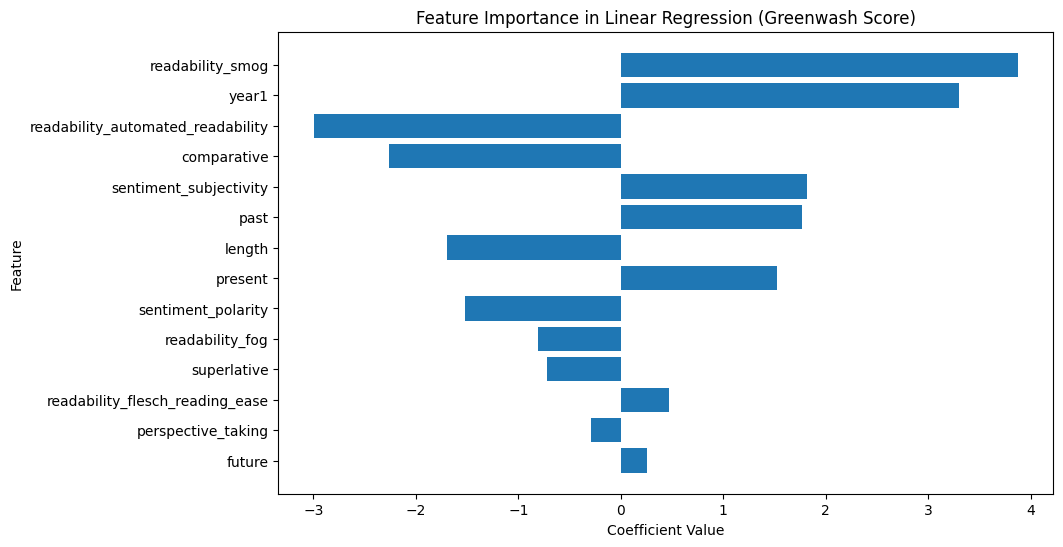

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 讀取數據
df = hm_features_non_overlapping_filtered.copy()

# 移除非數值欄位
non_numeric_cols = ['folder_name', 'exchange', 'ticker']
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# 確保 'greenwash_score' 存在，並移除 NaN
df_numeric = df_numeric.dropna(subset=['greenwash_score'])

# 定義 X（特徵）和 y（目標變數）
X = df_numeric.drop(columns=['greenwash_score'])
y = df_numeric['greenwash_score']

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_scaled, y)

# 取得回歸係數
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_scaled)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


# 顯示前 10 個最重要特徵
print(feature_importance.head(10))

# 畫出特徵重要性條形圖
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression (Greenwash Score)')
plt.gca().invert_yaxis()  # 讓影響力最強的變數排在上方
plt.show()


In [6]:
hm_features_overlapping_filtered = hm_features_overlapping[
    hm_features_overlapping['greenwash_score_mean'].notna() & 
    (hm_features_overlapping['greenwash_score_mean'] != 0)
]
# rename greenwash_score_mean to greenwash_score
hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)
# 再過濾欄位名稱中不包含 ESGBERT 的欄位
cols_to_keep = [col for col in hm_features_non_overlapping_filtered.columns if 'ESGBERT' not in col]
hm_features_overlapping_filtered = hm_features_overlapping_filtered[cols_to_keep]
hm_features_overlapping_filtered

/tmp/ipykernel_302914/3126218814.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)


,folder_name,perspective_taking,length,readability_fog,readability_flesch_reading_ease,readability_smog,readability_automated_readability,sentiment_polarity,sentiment_subjectivity,comparative,superlative,present,past,future,exchange,ticker,year1,greenwash_score
0,NASDAQ_PTC_2018_2019,0.004717,10.512329,14.17,28.47,17.4,17.2,0.132992,0.378544,26,3,436,189,4,NASDAQ,PTC,2018,3.741212
1,NASDAQ_TRMB_2018_2020,0.006696,11.166215,13.49,20.72,17.8,18.5,0.131486,0.386574,45,19,808,285,18,NASDAQ,TRMB,2018,-5.594654
2,NASDAQ_JBLU_2019_2020,0.011429,11.672013,12.65,29.18,16.9,17.2,0.111325,0.394300,51,27,1073,698,30,NASDAQ,JBLU,2019,-2.611591
3,NASDAQ_AAWW_2018_2019,0.008032,11.165281,12.93,21.53,17.5,17.8,0.126959,0.365044,37,32,822,310,9,NASDAQ,AAWW,2018,4.854945
4,NASDAQ_AMD_2014_2015,0.013514,12.480301,9.99,18.15,16.5,18.0,0.094548,0.378701,100,36,2276,1281,29,NASDAQ,AMD,2014,-14.358808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NYSE_CWT_2017_2018,0.001992,11.314962,15.28,23.80,18.4,20.0,0.113846,0.370221,53,22,645,582,22,NYSE,CWT,2017,-22.498283
178,NYSE_ACN_2020_2021,0.003686,11.544327,12.70,20.11,17.6,17.5,0.159957,0.397346,62,24,1098,445,23,NYSE,ACN,2020,-24.990763
179,NYSE_JBL_2018_2019,0.021951,11.457635,13.27,27.56,17.8,17.8,0.054992,0.301659,45,20,809,502,15,NYSE,JBL,2018,-15.095687
180,NYSE_BMI_2020_2021,0.014458,11.265643,12.02,15.41,17.4,16.9,0.109998,0.423015,28,11,831,413,13,NYSE,BMI,2020,-5.722273


In [7]:
# rename greenwash_score_mean to greenwash_score
# hm_features_overlapping_filtered.rename(columns={'greenwash_score_mean': 'greenwash_score'}, inplace=True)
# hm_features_overlapping_filtered.drop(columns=['year2'], inplace=True)

R2: 0.08292897400588928
MSE: 225.4546611430412
                              Feature  Coefficient
4                    readability_smog     3.538485
13                              year1     3.229485
5   readability_automated_readability    -2.697383
8                         comparative    -2.353691
7              sentiment_subjectivity     1.898264
11                               past     1.695538
10                            present     1.587933
1                              length    -1.527019
6                  sentiment_polarity    -1.498738
2                     readability_fog    -0.700696


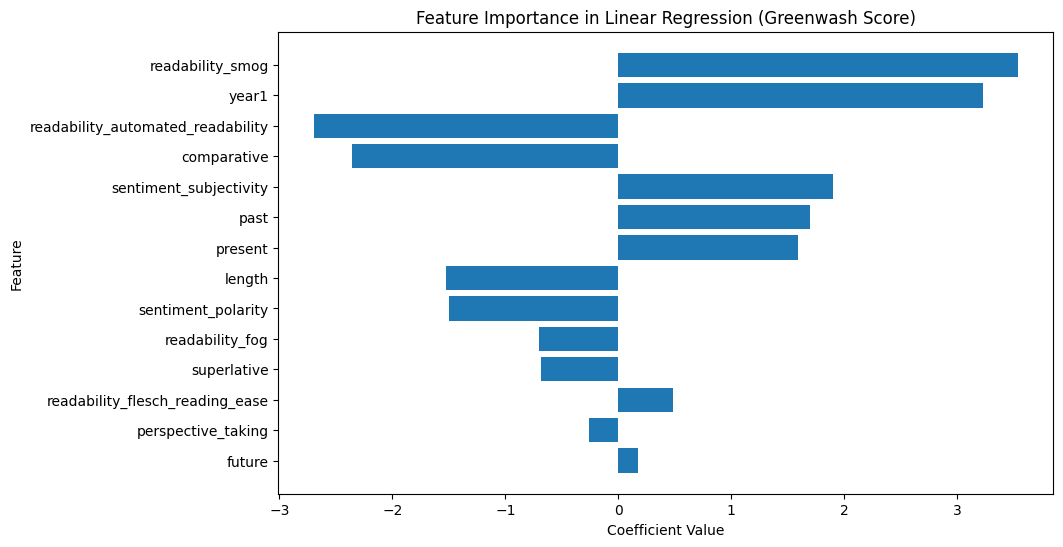

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



# 讀取數據
df = pd.concat([hm_features_overlapping_filtered, hm_features_non_overlapping_filtered]).copy()

# 移除非數值欄位
non_numeric_cols = ['folder_name', 'exchange', 'ticker']
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')

# 確保 'greenwash_score' 存在，並移除 NaN
df_numeric = df_numeric.dropna(subset=['greenwash_score'])

# 定義 X（特徵）和 y（目標變數）
X = df_numeric.drop(columns=['greenwash_score'])
y = df_numeric['greenwash_score']

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 建立線性回歸模型
model = LinearRegression()
model.fit(X_scaled, y)

# 取得回歸係數
coefficients = model.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_scaled)
print("R2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


# 顯示前 10 個最重要特徵
print(feature_importance.head(10))

# 畫出特徵重要性條形圖
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression (Greenwash Score)')
plt.gca().invert_yaxis()  # 讓影響力最強的變數排在上方
plt.show()
